In [81]:
## Importing required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [82]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [83]:
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4: Generate Descriptive Statistics and Visualizations

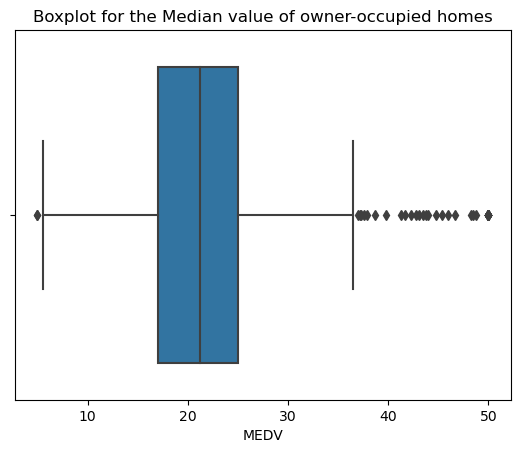

In [84]:
## Task 4.1 - For the "Median value of owner-occupied homes" provide a boxplot:

sns.boxplot(x=boston_df["MEDV"])
plt.title("Boxplot for the Median value of owner-occupied homes")
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

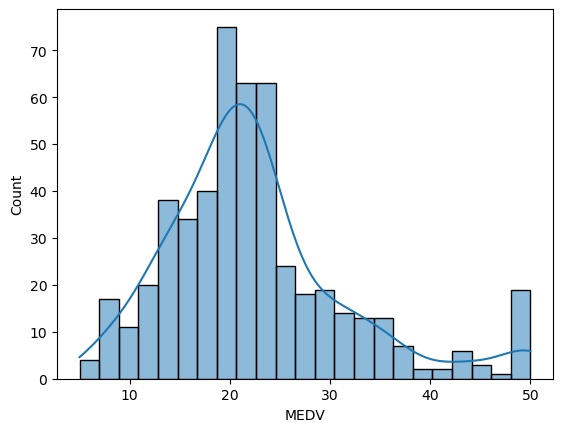

In [85]:
sns.histplot(x=boston_df["MEDV"], kde=True)

**Inference:**

* We can infer from the box plot and histogram that MEDV values are normally distibuted with large number of outliers towards the maximum value end (right end)

* The box plot also shows that the interquartile range (IQR) where the middle 50% of the data lies, is between approximately 5 and approx. 38

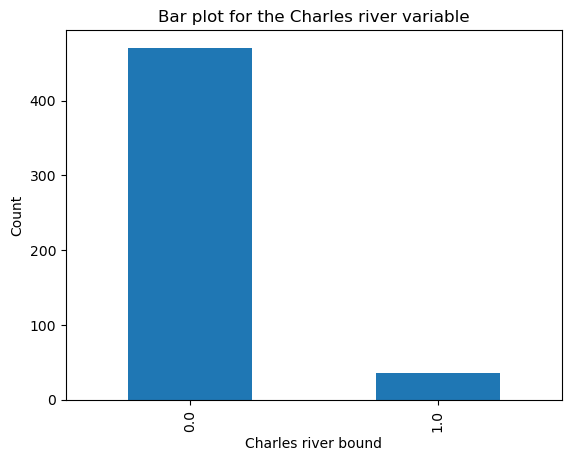

In [86]:
## Task 4.2 - Provide a  bar plot for the Charles river variable:

boston_df["CHAS"].value_counts().plot(kind="bar")
plt.xlabel("Charles river bound")
plt.ylabel("Count")
plt.title("Bar plot for the Charles river variable")
plt.show()

In [87]:
boston_df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

**Inference:**

* From the above bar chart, we can infer the The dataset is imbalanced in terms of the Charles River bound (CHAS) variable

* Only very few (35) that is, 6.9% of houses are bounded by Charles river

* The remaining 471 are not bounded by the river

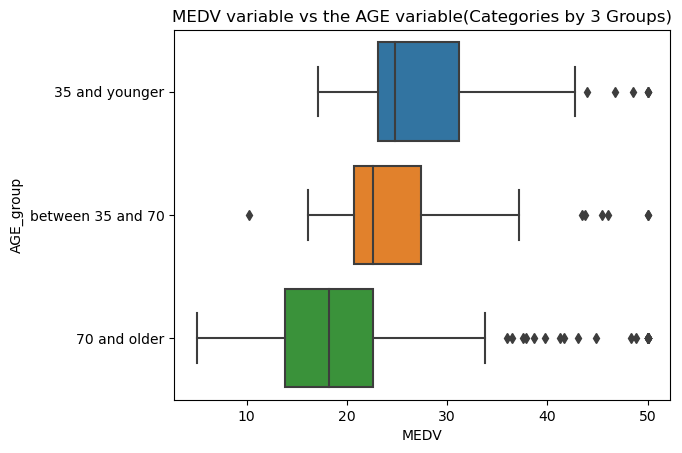

In [88]:
## Task 4.3 - Provide a boxplot for the MEDV variable vs the AGE variable.
  ##(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older):

## Creating new column("AGE_group") by categorising "AGE" into 3 groups:

## Define age bins and labels

bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', 'between 35 and 70', '70 and older']

## Create a new column 'AGE_group' based on the discretization
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

## Display the DataFrame with the new 'AGE_group' column

#print(boston_df)

sns.boxplot(y = boston_df["AGE_group"], x = boston_df['MEDV'],)
plt.title("MEDV variable vs the AGE variable(Categories by 3 Groups)")
plt.show()


**Inference:**

* When comparing MEDV with people between age groups '35 and younger' and 'between 35 and 70' are right skew and '70 and older' have normal distribution. Outliers are present in all 3 age groups categories.

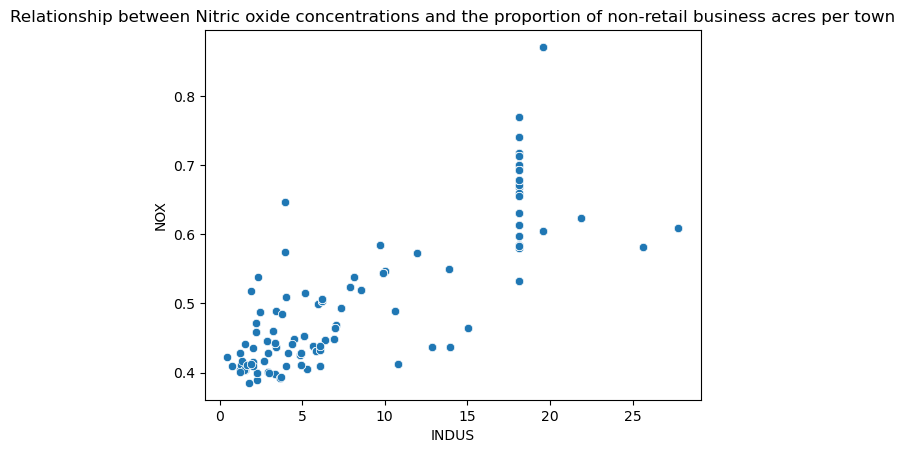

In [89]:
## Task 4.4 - Provide a scatter plot to show the relationship between Nitric oxide concentrations 
  ## and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x = boston_df["INDUS"], y = boston_df["NOX"])
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

In [90]:
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print(correlation)

0.7636514469209147


**Inference:**

* A correlation coefficient of 0.76 indicates a strong positive correlation between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS) in the dataset.

* From the above scatter plot, we can infer that as the correlation coefficient is close to 1, it suggests that as the proportion of non-retail business acres increases, the nitric oxide concentrations also tend to increase.

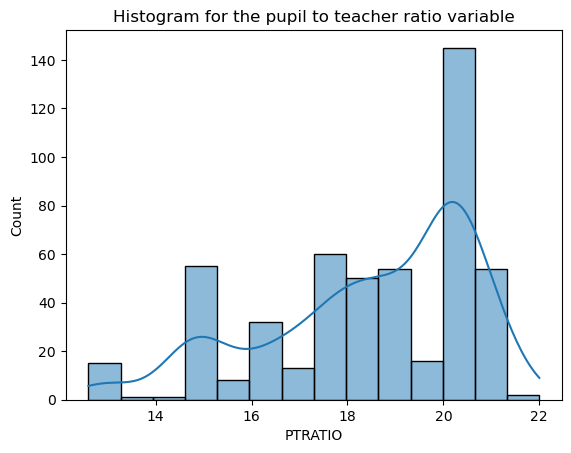

In [91]:
## Task 4.5 - Create a histogram for the pupil to teacher ratio variable:

sns.histplot(boston_df["PTRATIO"], kde=True)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

**Inference:**

* From above histogram plot, we observe that pupil-teacher ratio by town is left skewed means that PTRATIO count is huge after ratio after 20. 

# Task 5: Use the appropriate tests to answer the questions provided

**Task 5.1 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples):**

* Null Hypothesis (H0):
There is no significant difference in the median values of houses between those bounded by the Charles River and those not bounded by the Charles River.

* Alternative Hypothesis (H1):
There is a significant difference in the median values of houses between those bounded by the Charles River and those not bounded by the Charles River.

Therefore we can write as,

H0: μ1 = μ2 (The population means of the two groups are equal)
H1: μ1 ≠ μ2 (The population means of the two groups are not equal)

Here, μ1 represents the median value of houses bounded by the Charles River, and 
μ2 represents the median value of houses not bounded by the Charles River.

In [92]:
## Assuming CHAS: 0 if not bounded, 1 if bounded by the Charles River from dataframe boston_df

## Creating two samples based on the "CHAS" column with median value of houses "MEDV"

bounded_sample = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_sample = boston_df[boston_df['CHAS'] == 0]['MEDV']

## Performing the T-test for independent samples

t_statistic, p_value = stats.ttest_ind(bounded_sample, not_bounded_sample)

## Printing the results

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")          ## less than 0.05

## Interpreting the results with significance level

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median values.


**Conclusion:**

* From from T-test we observe that there is a statistically significant difference in the median values of houses depending on whether they are bounded by the Charles River or not.


**Task 5.2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

* Null Hypothesis (H0):
There is no significant difference in the median values of houses across different proportions of owner-occupied units built prior to 1940.

* Alternative Hypothesis (H1):
There is a significant difference in the median values of houses across different proportions of owner-occupied units built prior to 1940.

Therefore we can write as,

H0: μ1 = μ2 = μ3 = ... = μk (The population means of all groups are equal, where k is the number of groups)
H1: At least one population mean is different from the others.
Here, μ1, μ2, μ3, ..., μk represent the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).

In [93]:
## Filtering the age groups as below

thirtyfive_lower = boston_df[boston_df['AGE_group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_group'] == "between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['AGE_group'] == "70 and older"]['MEDV']

## Using ANOVA

f_statistic, p_value =  stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

## Printing the results

print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

## Interpreting the results with significance level

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values across AGE groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values across AGE groups.")

Statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a significant difference in median values across AGE groups.


**Conclusion:**

* Since the p-value is significantly less than the chosen significance level (0.05), we reject the null hypothesis.

* This suggests that the variable indicating the proportion of owner-occupied units built prior to 1940 (AGE) has a significant impact on the median values of houses.

**Task 5.3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

* Null Hypothesis (H0):
There is no linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

* Alternative Hypothesis (H1):
There is a linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

Therefore we can write as,

H0: ρ=0 (The population correlation coefficient is zero)
H1: ρ≠0 (The population correlation coefficient is not equal to zero)

Here, 
ρ represents the population correlation coefficient between nitric oxide concentrations and the proportion of non-retail business acres per town.
    

In [94]:
## Calculate Pearson correlation coefficient and p-value

corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

## Printing the results

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

## Interpret the results

alpha = 0.05  # Significance level

if p_value > alpha:
    print("Fail to reject the null hypothesis. There is no evidence of a significant relationship.")
else:
    print("Reject the null hypothesis. There is evidence of a significant relationship.")

Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241167e-98
Reject the null hypothesis. There is evidence of a significant relationship.


**Conclusion:**

* Coefficient is 0.76, indicate strong positive correlation, which suggests that as the proportion of non-retail business acres per town increases, the Nitric oxide concentrations also tend to increase.

* The p-value is extremely small, much less than the commonly used significance level of 0.05. This low p-value indicates strong evidence against the null hypothesis.

* Since the p-value is significantly less than the chosen significance level, we reject the null hypothesis. Therefore, there is strong evidence of a significant positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

**Task 5.4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

* Null Hypothesis (H0):
There is no linear relationship between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes.

* Alternative Hypothesis (H1):
There is a linear relationship between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes.

Therefore we can write as,

H0: β0 = 0 (The population regression coefficient for the distance variable is zero)
H1: β1 ≠ 0 (The population regression coefficient for the distance variable is not equal to zero)

Here, 
    β1 represents the population regression coefficient for the weighted distance to the five Boston employment centres.

In [95]:
## Adding a constant term to the predictor variable

X = sm.add_constant(boston_df['DIS'])

## Fit the regression model

model = sm.OLS(boston_df['MEDV'], X).fit()

## Getting the result of the regression

reg_model = model.summary()

## Printing the result

print(reg_model)

## finding p value from result summary(reg_model) table

print("\np-value is",reg_model.tables[1].data[1][4])

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        18:31:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:**

* From above summary, we infer that coefficient of DIS is 1.0916 and assuming this coefficient is statistically significant (p-value < 0.05), we would reject the null hypothesis. 

* Therefore, there is evidence of a statistically significant linear relationship between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes.